In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'Healthcare Providers.csv'
data = pd.read_csv(file_path)
data_with_all_col=data

In [3]:
# Columns to retain for fraud detection analysis
selected_columns = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Allowed Amount",
    "Average Medicare Standardized Amount",
    "HCPCS Code",
    "Provider Type",
    "Place of Service",
    "State Code of the Provider",
    "Medicare Participation Indicator",
]

# Select specified columns
df = data[selected_columns].copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   Number of Services                                        100000 non-null  object
 1   Number of Medicare Beneficiaries                          100000 non-null  object
 2   Number of Distinct Medicare Beneficiary/Per Day Services  100000 non-null  object
 3   Average Submitted Charge Amount                           100000 non-null  object
 4   Average Medicare Payment Amount                           100000 non-null  object
 5   Average Medicare Allowed Amount                           100000 non-null  object
 6   Average Medicare Standardized Amount                      100000 non-null  object
 7   HCPCS Code                                                100000 non-null  object
 8   Provider Type  

In [5]:
# Convert numerical features stored as objects to numeric
numerical_object_columns = [
    "Number of Services",
    "Number of Medicare Beneficiaries",
    "Number of Distinct Medicare Beneficiary/Per Day Services",
    "Average Submitted Charge Amount",
    "Average Medicare Payment Amount",
    "Average Medicare Allowed Amount",
    "Average Medicare Standardized Amount"
]

In [6]:
# Coerce conversion errors to NaN
for column in numerical_object_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [7]:
# missing_values=df.isnull().sum()
# missing_values

In [8]:
# df['Number_of_Services'].mean()

In [9]:
df.columns=df.columns.str.strip().str.replace(" ","_")

# Number of Services

## Suggested Imputation Type: Grouped Median Imputation
##### Why?
- Provider-Specific Trends: The number of services billed varies significantly by Provider Type. For example, a cardiologist likely performs more services than a podiatrist.
- Preserves Data Distribution: Median imputation within groups avoids skewing the data due to outliers.
- Efficient and Simple: This approach works well for a large dataset and is computationally inexpensive.

In [10]:
print("Missing values before imputation:", df["Number_of_Services"].isnull().sum())


Missing values before imputation: 2653


In [11]:
df['Provider_Type'].value_counts()

Provider_Type
Diagnostic Radiology                                12537
Internal Medicine                                   11366
Family Practice                                      9760
Nurse Practitioner                                   5713
Cardiology                                           4602
                                                    ...  
Certified Nurse Midwife                                 7
Radiation Therapy Center                                3
Mammography Center                                      3
Pharmacy                                                1
Advanced Heart Failure and Transplant Cardiology        1
Name: count, Length: 90, dtype: int64

In [12]:
median_services_by_provider=df.groupby('Provider_Type')["Number_of_Services"].median()
median_services_by_provider

Provider_Type
Addiction Medicine                                   50.5
Advanced Heart Failure and Transplant Cardiology     81.0
All Other Suppliers                                  48.0
Allergy/ Immunology                                  52.0
Ambulance Service Provider                          126.0
                                                    ...  
Surgical Oncology                                    37.0
Thoracic Surgery                                     23.5
Undefined Physician type                             39.0
Urology                                              40.0
Vascular Surgery                                     33.0
Name: Number_of_Services, Length: 90, dtype: float64

In [13]:
df['Number_of_Services']=df['Number_of_Services'].fillna(
    df.groupby('Provider_Type')['Number_of_Services'].transform("median")
)
print("Missing values after imputation:", df["Number_of_Services"].isnull().sum())


Missing values after imputation: 0



### For the "Number of Medicare Beneficiaries" column with 405 missing values, the imputation strategy should consider the relationship between this column and other relevant features. Here's my recommendation:

####  Recommended Imputation Type: Grouped Median Imputation
Why?
- The Number of Medicare Beneficiaries is often correlated with other columns like Number of Services, Provider Type, and possibly Place of Service.
- Grouped median imputation ensures that the imputed values align with realistic expectations for the specific provider's specialty and service characteristics.

In [14]:
print("Missing values before imputation",df['Number_of_Medicare_Beneficiaries'].isnull().sum())

Missing values before imputation 405


In [15]:
median_beneficiaries_by_provider = df.groupby("Provider_Type")["Number_of_Medicare_Beneficiaries"].median()

In [16]:
df["Number_of_Medicare_Beneficiaries"] = df["Number_of_Medicare_Beneficiaries"].fillna(
    df.groupby("Provider_Type")["Number_of_Medicare_Beneficiaries"].transform("median")
)

print("Missing values after imputation:", df["Number_of_Medicare_Beneficiaries"].isnull().sum())

Missing values after imputation: 0


### Recommended Imputation Type: Grouped Median Imputation
Why?
- The Average Submitted Charge Amount is closely related to specific procedures (HCPCS Code), the provider's specialty (Provider Type), and the Place of Service.
- Grouped median imputation ensures imputed values align with realistic expectations for similar services.

In [17]:
print("Missing values before imputation:", df["Average_Submitted_Charge_Amount"].isnull().sum())
median_charge_by_hcpcs = df.groupby("HCPCS_Code")["Average_Submitted_Charge_Amount"].median()
df["Average_Submitted_Charge_Amount"] = df["Average_Submitted_Charge_Amount"].fillna(
    df.groupby("HCPCS_Code")["Average_Submitted_Charge_Amount"].transform("median")
)
overall_median_charge = df["Average_Submitted_Charge_Amount"].median()
df["Average_Submitted_Charge_Amount"] = df["Average_Submitted_Charge_Amount"].fillna(overall_median_charge)
print("Missing values after imputation:", df["Average_Submitted_Charge_Amount"].isnull().sum())


Missing values before imputation: 6723
Missing values after imputation: 0


In [18]:
print("Missing values before imputation:", df["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"].isnull().sum())
median_beneficiaries_per_day = df.groupby("Provider_Type")["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"].median()
df["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"] = df["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"].fillna(
    df.groupby("Provider_Type")["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"].transform("median")
)
overall_median_beneficiaries_per_day = df["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"].median()
df["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"] = df["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"].fillna(
    overall_median_beneficiaries_per_day
)
print("Missing values after imputation:", df["Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services"].isnull().sum())

Missing values before imputation: 1500
Missing values after imputation: 0


In [19]:
print("Missing values before imputation:", df["Average_Medicare_Payment_Amount"].isnull().sum())
median_payment_by_hcpcs = df.groupby("HCPCS_Code")["Average_Medicare_Payment_Amount"].median()
df["Average_Medicare_Payment_Amount"] = df["Average_Medicare_Payment_Amount"].fillna(
    df.groupby("HCPCS_Code")["Average_Medicare_Payment_Amount"].transform("median")
)
overall_median_payment = df["Average_Medicare_Payment_Amount"].median()
df["Average_Medicare_Payment_Amount"] = df["Average_Medicare_Payment_Amount"].fillna(overall_median_payment)
print("Missing values after imputation:", df["Average_Medicare_Payment_Amount"].isnull().sum())

Missing values before imputation: 466
Missing values after imputation: 0


In [20]:
print("Missing values before imputation:", df["Average_Medicare_Allowed_Amount"].isnull().sum())
median_allowed_by_hcpcs = df.groupby("HCPCS_Code")["Average_Medicare_Allowed_Amount"].median()
df["Average_Medicare_Allowed_Amount"] = df["Average_Medicare_Allowed_Amount"].fillna(
    df.groupby("HCPCS_Code")["Average_Medicare_Allowed_Amount"].transform("median")
)
overall_median_allowed = df["Average_Medicare_Allowed_Amount"].median()
df["Average_Medicare_Allowed_Amount"] = df["Average_Medicare_Allowed_Amount"].fillna(overall_median_allowed)
print("Missing values after imputation:", df["Average_Medicare_Allowed_Amount"].isnull().sum())

Missing values before imputation: 745
Missing values after imputation: 0


In [21]:
print("Missing values before imputation:", df["Average_Medicare_Standardized_Amount"].isnull().sum())
median_standardized_by_hcpcs = df.groupby("HCPCS_Code")["Average_Medicare_Standardized_Amount"].median()
df["Average_Medicare_Standardized_Amount"] = df["Average_Medicare_Standardized_Amount"].fillna(
    df.groupby("HCPCS_Code")["Average_Medicare_Standardized_Amount"].transform("median")
)
overall_median_standardized = df["Average_Medicare_Standardized_Amount"].median()
df["Average_Medicare_Standardized_Amount"] = df["Average_Medicare_Standardized_Amount"].fillna(overall_median_standardized)
print("Missing values after imputation:", df["Average_Medicare_Standardized_Amount"].isnull().sum())

Missing values before imputation: 470
Missing values after imputation: 0


In [22]:
missing_values=df.isnull().sum()
missing_values

Number_of_Services                                          0
Number_of_Medicare_Beneficiaries                            0
Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services    0
Average_Submitted_Charge_Amount                             0
Average_Medicare_Payment_Amount                             0
Average_Medicare_Allowed_Amount                             0
Average_Medicare_Standardized_Amount                        0
HCPCS_Code                                                  0
Provider_Type                                               0
Place_of_Service                                            0
State_Code_of_the_Provider                                  0
Medicare_Participation_Indicator                            0
dtype: int64

In [23]:
original_data=df.copy

In [24]:
df["Payment_to_Charge_Ratio"] = df["Average_Medicare_Payment_Amount"] / df["Average_Submitted_Charge_Amount"]
df["Allowed_to_Charge_Ratio"] = df["Average_Medicare_Allowed_Amount"] / df["Average_Submitted_Charge_Amount"]
print("New Derived Features Added:")

New Derived Features Added:


In [25]:
original_data=df

In [26]:
df

,Number_of_Services,Number_of_Medicare_Beneficiaries,Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services,Average_Submitted_Charge_Amount,Average_Medicare_Payment_Amount,Average_Medicare_Allowed_Amount,Average_Medicare_Standardized_Amount,HCPCS_Code,Provider_Type,Place_of_Service,State_Code_of_the_Provider,Medicare_Participation_Indicator,Payment_to_Charge_Ratio,Allowed_to_Charge_Ratio
0,27.0,24.0,27.0,305.211111,157.262222,200.587778,160.908889,99223,Internal Medicine,F,MO,Y,0.515257,0.657210
1,175.0,175.0,175.0,548.800000,118.830000,123.730000,135.315257,G0202,Obstetrics & Gynecology,O,NC,Y,0.216527,0.225456
2,32.0,13.0,32.0,155.000000,64.439688,90.650000,60.595937,99348,Podiatry,O,CT,Y,0.415740,0.584839
3,20.0,18.0,20.0,5.000000,3.430000,3.500000,3.430000,81002,Internal Medicine,O,MO,Y,0.686000,0.700000
4,33.0,24.0,31.0,40.000000,19.539394,26.520000,19.057576,96372,Internal Medicine,O,FL,Y,0.488485,0.663000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20.0,20.0,20.0,214.000000,60.725500,85.372500,62.248500,97162,Physical Therapist in Private Practice,O,IL,Y,0.283764,0.398937
99996,136.0,107.0,136.0,144.051471,30.006176,61.270000,37.040221,99213,Nurse Practitioner,O,OR,Y,0.208302,0.425334
99997,11.0,11.0,11.0,109.545455,14.090000,17.980000,14.620000,93320,Cardiology,F,MO,Y,0.128622,0.164133
99998,12.0,12.0,12.0,65.000000,29.930000,30.540000,25.320000,G0008,Internal Medicine,O,NY,Y,0.460462,0.469846


## Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher

In [28]:
# df.info()

In [29]:
data=df

In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher

# Assuming `data` is your dataframe

# **1. Frequency Encoding for `Provider_Type` and `State_Code_of_the_Provider`**
for column in ['Provider_Type', 'State_Code_of_the_Provider']:
    freq_map = data[column].value_counts(normalize=True).to_dict()
    data[f'{column}_Freq'] = data[column].map(freq_map)

# **2. One-Hot Encoding for `Place_of_Service`**
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
place_of_service_encoded = one_hot_encoder.fit_transform(data[['Place_of_Service']])
# Convert back to DataFrame with proper column names
place_of_service_df = pd.DataFrame(place_of_service_encoded, columns=one_hot_encoder.get_feature_names_out(['Place_of_Service']))
data = pd.concat([data, place_of_service_df], axis=1)

# **3. Binary Encoding for `Medicare_Participation_Indicator`**
binary_map = {'Y': 1, 'N': 0}
data['Medicare_Participation_Encoded'] = data['Medicare_Participation_Indicator'].map(binary_map)

# Correcting FeatureHasher input
hasher = FeatureHasher(n_features=10, input_type='string')  # Adjust n_features as needed
hashed_features = hasher.transform(data['HCPCS_Code'].astype(str).apply(lambda x: [x]))
hashed_features_df = pd.DataFrame(hashed_features.toarray(), columns=[f'HCPCS_Code_Hash_{i}' for i in range(10)])

# Add the hashed features to the dataframe
data = pd.concat([data, hashed_features_df], axis=1)

# Drop the original column
data = data.drop(columns=['HCPCS_Code'])

# Display the resulting dataset
# print(data.head())
data_with_allcol = data
data = data.drop(columns=['Provider_Type', 'State_Code_of_the_Provider', 'Place_of_Service', 'Medicare_Participation_Indicator'])



In [31]:
# data.to_csv("Data.csv")

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
normalized_data=scaler.fit_transform(data)

In [35]:
input_dim=normalized_data.shape[1]

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_val=train_test_split(normalized_data,test_size=0.2,random_state=42)

In [37]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU is available and will be used.")
    except RuntimeError as e:
        print("Error enabling GPU memory growth:", e)
else:
    print("GPU not available. Falling back to CPU.")

GPU not available. Falling back to CPU.


In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
import tensorflow as tf

# Define the autoencoder architecture
# Make encoding_dim a tunable parameter
def create_autoencoder(encoding_dim=16):
    input_layer = Input(shape=(normalized_data.shape[1],))
    encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
    encoded = Dropout(0.2)(encoded)  # Dropout to prevent overfitting
    encoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(encoded)
    encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=l2(0.001))(encoded)  # Bottleneck layer

    decoded = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(encoded)
    decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(decoded)
    decoded = Dense(normalized_data.shape[1], activation='sigmoid', kernel_regularizer=l2(0.001))(decoded)

    # Build the autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoded)

    return autoencoder

# Create the autoencoder model with a tunable encoding dimension
autoencoder = create_autoencoder(encoding_dim=16)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Log learning rate changes
class LoggingLearningRateCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.learning_rate)
        print(f"Epoch {epoch + 1}: Learning rate is {lr}")

logging_lr_callback = LoggingLearningRateCallback()

model_checkpoint = ModelCheckpoint(
    filepath='best_autoencoder.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model
history = autoencoder.fit(
    x=normalized_data,
    y=normalized_data,
    epochs=100,
    batch_size=32,
    validation_split=0.3,
    callbacks=[early_stopping, reduce_lr, model_checkpoint, logging_lr_callback]
)


Epoch 1/100
2165/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.9670
Epoch 1: val_loss improved from inf to 0.83598, saving model to best_autoencoder.keras
Epoch 1: Learning rate is 0.0010000000474974513
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.9664 - val_loss: 0.8360 - learning_rate: 0.0010
Epoch 2/100
2157/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9019
Epoch 2: val_loss improved from 0.83598 to 0.82553, saving model to best_autoencoder.keras
Epoch 2: Learning rate is 0.0010000000474974513
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9013 - val_loss: 0.8255 - learning_rate: 0.0010
Epoch 3/100
2138/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8495
Epoch 3: val_loss improved from 0.82553 to 0.81604, saving model to best_autoencoder.keras
Epoch 3: Learning rate is 0.0010000000474974513
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8496 - val_loss: 0.8160 - learning_rate: 0.0010
Epoch 4/100
2147/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8261
Ep

Epoch 23: Learning rate is 0.0005000000237487257
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8147 - val_loss: 0.8020 - learning_rate: 5.0000e-04
Epoch 24/100
2141/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8122
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 24: val_loss did not improve from 0.80170
Epoch 24: Learning rate is 0.0002500000118743628
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8127 - val_loss: 0.8018 - learning_rate: 5.0000e-04
Epoch 25/100
2135/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.8544
Epoch 25: val_loss improved from 0.80170 to 0.80103, saving model to best_autoencoder.keras
Epoch 25: Learning rate is 0.0002500000118743628
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8538 - val_loss: 0.8010 - learning_rate: 2.5000e-04
Epoch 26/100
2167/2188 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.8109
Epoch 26: val_loss did not improve from 0.80103
Epoch 26: Learning rate is 0.0002500000118743628
2188/2

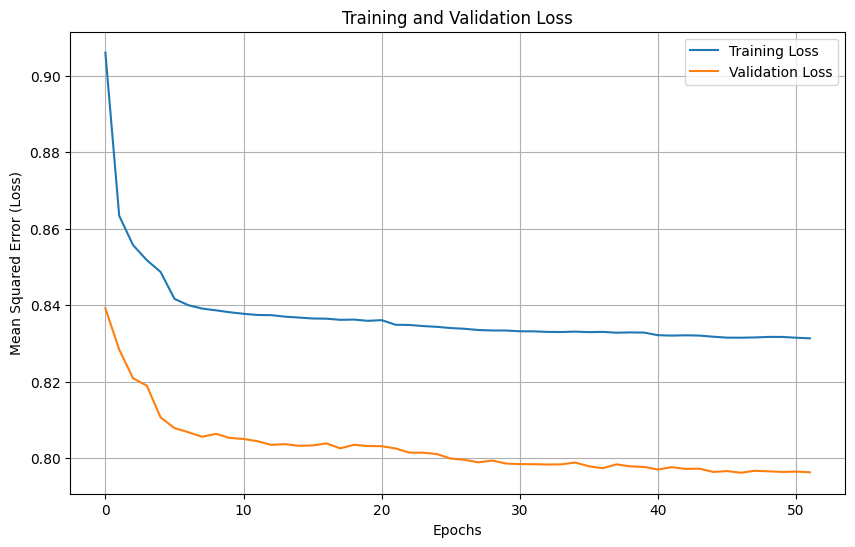

In [40]:
import matplotlib.pyplot as plt

# Extract loss values for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
predictions = autoencoder.predict(normalized_data)

# Evaluate reconstruction errors
reconstruction_errors = np.mean(np.square(normalized_data - predictions), axis=1)

print("Reconstruction Errors:", reconstruction_errors)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 765us/step
Reconstruction Errors: [0.44328032 0.75625038 0.61048257 ... 0.47814232 0.35934555 0.84410111]


In [45]:
df['Error']=reconstruction_errors

In [51]:
reconstruction_errors

array([0.44328032, 0.75625038, 0.61048257, ..., 0.47814232, 0.35934555,
       0.84410111])

In [71]:
threshold = np.percentile(reconstruction_errors, 95)
print(f"Anomaly detection threshold: {threshold}")

Anomaly detection threshold: 1.2657034931652982


In [72]:
data_with_all_col['flag']=(reconstruction_errors > threshold).astype(int)

In [73]:
data_with_all_col['Error']=reconstruction_errors

In [78]:
data_with_all_col['flag'].value_counts()
data_with_all_col.to_csv('all_coll_data.csv')

In [44]:
original_data['Anomaly_Flag'].value_counts()

Anomaly_Flag
0    95000
1     5000
Name: count, dtype: int64

In [138]:
# original_data.to_csv("predicted_data.csv")

In [139]:
original_data

,Number_of_Services,Number_of_Medicare_Beneficiaries,Number_of_Distinct_Medicare_Beneficiary/Per_Day_Services,Average_Submitted_Charge_Amount,Average_Medicare_Payment_Amount,Average_Medicare_Allowed_Amount,Average_Medicare_Standardized_Amount,HCPCS_Code,Provider_Type,Place_of_Service,State_Code_of_the_Provider,Medicare_Participation_Indicator,Payment_to_Charge_Ratio,Allowed_to_Charge_Ratio,Anomaly_Flag
0,27.0,24.0,27.0,305.211111,157.262222,200.587778,160.908889,99223,Internal Medicine,F,MO,Y,0.515257,0.657210,0
1,175.0,175.0,175.0,548.800000,118.830000,123.730000,135.315257,G0202,Obstetrics & Gynecology,O,NC,Y,0.216527,0.225456,0
2,32.0,13.0,32.0,155.000000,64.439688,90.650000,60.595937,99348,Podiatry,O,CT,Y,0.415740,0.584839,0
3,20.0,18.0,20.0,5.000000,3.430000,3.500000,3.430000,81002,Internal Medicine,O,MO,Y,0.686000,0.700000,0
4,33.0,24.0,31.0,40.000000,19.539394,26.520000,19.057576,96372,Internal Medicine,O,FL,Y,0.488485,0.663000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,20.0,20.0,20.0,214.000000,60.725500,85.372500,62.248500,97162,Physical Therapist in Private Practice,O,IL,Y,0.283764,0.398937,0
99996,136.0,107.0,136.0,144.051471,30.006176,61.270000,37.040221,99213,Nurse Practitioner,O,OR,Y,0.208302,0.425334,0
99997,11.0,11.0,11.0,109.545455,14.090000,17.980000,14.620000,93320,Cardiology,F,MO,Y,0.128622,0.164133,0
99998,12.0,12.0,12.0,65.000000,29.930000,30.540000,25.320000,G0008,Internal Medicine,O,NY,Y,0.460462,0.469846,0
